In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

============================================================
HIGH-DIMENSIONAL RIDGE REGULARISATION
Complete Linear Algebra Analysis (Primal & Dual)
============================================================

In [2]:
np.set_printoptions(precision=4, suppress=True)

In [3]:
print("\n📐 High-Dimensional Ridge Regularisation")
print("Complete Linear Algebra Analysis (Primal & Dual)")
print("Regime: d >> n\n")


📐 High-Dimensional Ridge Regularisation
Complete Linear Algebra Analysis (Primal & Dual)
Regime: d >> n



============================================================
1. DATA GENERATION
============================================================

In [4]:
print("1) Data Generation")

1) Data Generation


In [5]:
np.random.seed(42)
n = 60
d = 500
s = 8
sigma = 0.1

In [6]:
X = np.random.randn(n, d)

In [7]:
beta_true = np.zeros(d)
beta_true[:s] = np.random.randn(s)

In [8]:
y = X @ beta_true + sigma * np.random.randn(n)

In [9]:
print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}\n")

X shape = (60, 500)
y shape = (60,)



============================================================
2. RANK & NULL SPACE
============================================================

In [10]:
print("2) Rank Deficiency and Null Space")

2) Rank Deficiency and Null Space


In [11]:
rank_X = np.linalg.matrix_rank(X)
null_dim = d - rank_X

In [12]:
print(f"rank(X) = {rank_X}")
print(f"ambient dimension d = {d}")
print(f"nullity = {null_dim}\n")

rank(X) = 60
ambient dimension d = 500
nullity = 440



============================================================
3. SPECTRAL ANALYSIS OF XᵀX
============================================================

In [13]:
print("3) Spectrum of XᵀX")

3) Spectrum of XᵀX


In [14]:
XtX = X.T @ X
eigvals = np.linalg.eigvalsh(XtX)

In [15]:
min_eig = eigvals.min()
num_zero = np.sum(eigvals < 1e-10)

In [16]:
print(f"Smallest eigenvalue of XᵀX = {min_eig:.2e}")
print(f"Number of (near) zero eigenvalues = {num_zero}\n")

Smallest eigenvalue of XᵀX = -4.86e-13
Number of (near) zero eigenvalues = 440



============================================================
4. RIDGE DEFINITIONS
============================================================

In [17]:
print("4) Ridge Regression Formulations")

4) Ridge Regression Formulations


In [18]:
print("Primal ridge:")
print("(XᵀX + λI) β = Xᵀ y")

Primal ridge:
(XᵀX + λI) β = Xᵀ y


In [19]:
print("\nDual ridge:")
print("β = Xᵀ (X Xᵀ + λI)⁻¹ y\n")


Dual ridge:
β = Xᵀ (X Xᵀ + λI)⁻¹ y



============================================================
5. PRIMAL & DUAL IMPLEMENTATIONS
============================================================

In [20]:
def ridge_primal(X, y, lam):
    return np.linalg.solve(
        X.T @ X + lam * np.eye(X.shape[1]),
        X.T @ y
    )

In [21]:
def ridge_dual(X, y, lam):
    alpha = np.linalg.solve(
        X @ X.T + lam * np.eye(X.shape[0]),
        y
    )
    return X.T @ alpha

In [22]:
lam = 1.0
print(f"Using regularisation λ = {lam}\n")

Using regularisation λ = 1.0



In [23]:
beta_primal = ridge_primal(X, y, lam)
beta_dual = ridge_dual(X, y, lam)

============================================================
6. PRIMAL ≡ DUAL (NUMERICAL)
============================================================

In [24]:
print("5) Primal ≡ Dual: Numerical Equivalence")

5) Primal ≡ Dual: Numerical Equivalence


In [25]:
diff = np.linalg.norm(beta_primal - beta_dual)

In [26]:
print(f"||β_primal − β_dual||₂ = {diff:.2e}")

||β_primal − β_dual||₂ = 1.29e-13


============================================================
7. CONDITION NUMBER ANALYSIS
============================================================

In [27]:
print("6) Conditioning and Numerical Stability")

6) Conditioning and Numerical Stability


In [28]:
nonzero_eigs = eigvals[eigvals > 1e-10]
cond_unreg = nonzero_eigs.max() / nonzero_eigs.min()

In [29]:
print(f"Condition number of XᵀX = {cond_unreg:.4e}\n")

Condition number of XᵀX = 3.9433e+00



In [30]:
def cond_ridge(eigvals, lam):
    e = eigvals + lam
    return e.max() / e.min()

In [31]:
lams = np.array([1e-3, 1e-2, 1e-1, 1, 10, 100])
conds = [cond_ridge(eigvals, l) for l in lams]

In [32]:
df_cond = pd.DataFrame({
    "lambda": lams,
    "cond(XᵀX + λI)": conds
})

In [33]:
print("Condition number vs λ:")
print(df_cond, "\n")

Condition number vs λ:
    lambda  cond(XᵀX + λI)
0    0.001   857340.980866
1    0.010    85734.998049
2    0.100     8574.399805
3    1.000      858.339980
4   10.000       86.733998
5  100.000        9.573400 



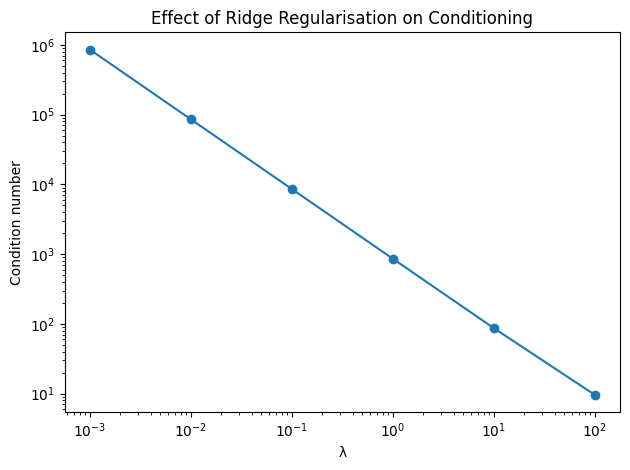

In [34]:
plt.figure()
plt.plot(lams, conds, marker="o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("λ")
plt.ylabel("Condition number")
plt.title("Effect of Ridge Regularisation on Conditioning")
plt.tight_layout()
plt.show()

============================================================
8. ESTIMATION ERROR
============================================================

In [35]:
print("7) Estimation Error")

7) Estimation Error


In [36]:
err = np.linalg.norm(beta_primal - beta_true)

In [37]:
print(f"||β̂_ridge − β*||₂ = {err:.4f}")
print("→ Bias introduced by ridge regularisation\n")

||β̂_ridge − β*||₂ = 2.6982
→ Bias introduced by ridge regularisation



============================================================
9. COMPUTATIONAL COST
============================================================

In [38]:
print("8) Computational Perspective")

8) Computational Perspective


In [39]:
print(f"Primal inversion: {d} × {d}")
print(f"Dual inversion:   {n} × {n}")

Primal inversion: 500 × 500
Dual inversion:   60 × 60


In [40]:
print("\nSince d >> n, the dual formulation is computationally preferable.\n")


Since d >> n, the dual formulation is computationally preferable.



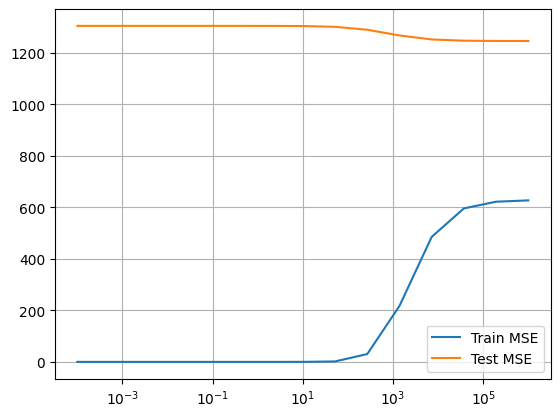

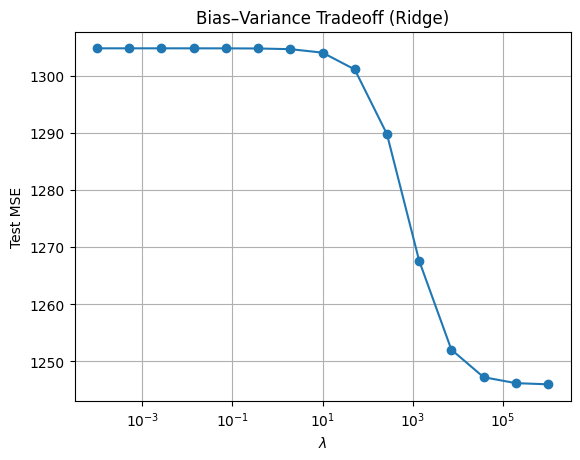

In [47]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Create high-dimensional noisy data
# -----------------------------
np.random.seed(0)

n = 50
d = 1000

X = np.random.randn(n, d)
w_true = np.random.randn(d)
noise_std = 2.0                       # <-- key for bias–variance
y = X @ w_true + noise_std * np.random.randn(n)

# -----------------------------
# Train–test split
# -----------------------------
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)

# -----------------------------
# Ridge (primal)
# -----------------------------
def ridge_primal(X, y, lam):
    return np.linalg.solve(
        X.T @ X + lam * np.eye(X.shape[1]),
        X.T @ y
    )

train_errs, test_errs = [], []

for lam in lams:
    w = ridge_primal(Xtr, ytr, lam)
    train_errs.append(np.mean((Xtr @ w - ytr)**2))
    test_errs.append(np.mean((Xte @ w - yte)**2))

plt.semilogx(lams, train_errs, label="Train MSE")
plt.semilogx(lams, test_errs, label="Test MSE")
plt.legend()
plt.grid(True)
plt.show()


# -----------------------------
# Bias–Variance experiment
# -----------------------------
lams = np.logspace(-4, 6, 15)

errors = []

for lam in lams:
    w = ridge_primal(Xtr, ytr, lam)
    
    # ✔ use MSE (not raw norm)
    err = np.mean((Xte @ w - yte) ** 2)
    errors.append(err)

# -----------------------------
# Plot
# -----------------------------
plt.figure()
plt.semilogx(lams, errors, marker='o')
plt.xlabel(r'$\lambda$')
plt.ylabel('Test MSE')
plt.title('Bias–Variance Tradeoff (Ridge)')
plt.grid(True)
plt.show()
